<a href="https://colab.research.google.com/github/AlefeTiago/signal_systems_projects/blob/main/Exp01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
!git clone https://github.com/AlefeTiago/signal_systems_projects.git

fatal: destination path 'signal_systems_projects' already exists and is not an empty directory.


**Aqui, só importei o GIT porque ja tinha os arquivos que precisávemos lá! **

---

In [152]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import math


In [153]:
fs, som = wavfile.read('/content/signal_systems_projects/project01_sampling/Grilo.wav')

In [154]:
ipd.Audio(som,rate=int(fs))

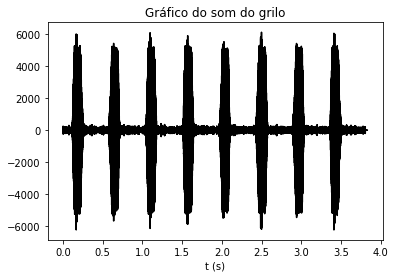

In [155]:
t = np.arange(som.size)/fs
plt.plot(t,som,c='black');
plt.title('Gráfico do som do grilo') # Tem unidade aqui?
plt.xlabel('t (s)');

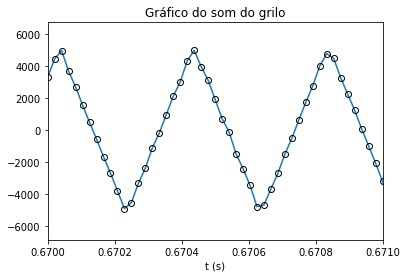

In [156]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none',c='black') # Adicionei essas bolinhas que nem ele faz no roteiro pra mostrar onde realmente tem amostras
plt.title('Gráfico do som do grilo') # Tem unidade aqui?
plt.xlabel('t (s)');
plt.xlim((0.67,0.671));

In [157]:
fft_grilo=sci.fft.fft(som)


In [158]:
fft_grilo

array([-20245.           -0.j        ,    998.29689311 +106.57617438j,
          942.57222951+1002.05297604j, ...,
         1285.30204497 -540.93508661j,    942.57222951-1002.05297604j,
          998.29689311 -106.57617438j])

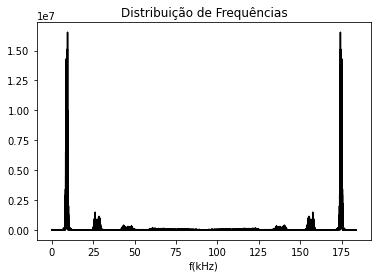

In [159]:
frequencias = np.arange(fft_grilo.size)/10**3
amplitudes = np.abs(fft_grilo)

plt.plot(frequencias,amplitudes,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');

# Esse gráfico não precisa ser de 0 a 2pi?

(165.0, 185.0)

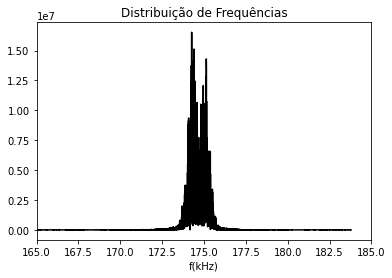

In [160]:
# Mostrando em xlim, apenas uma parte das frequências (sem repet)

plt.plot(frequencias,amplitudes,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');
plt.xlim((165,185))


(0.0, 20.0)

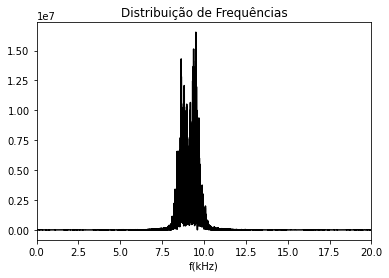

In [161]:
# Mostrando em xlim, zoom nas frequências principais

plt.plot(frequencias,amplitudes,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');
plt.xlim((0,20))

In [162]:
### SubAmostragem do Sinal ###

In [163]:
subamostrado = som[::9]
fs_nova = fs/9

In [164]:
ipd.Audio(subamostrado,rate=int(fs_nova))

In [165]:
fft_grilo_sub=sci.fft.fft(subamostrado)

In [166]:
fft_grilo_sub

array([ 3345.           -0.j        ,  4903.56927382-5354.09945109j,
       -2204.15528925-1271.12935314j, ..., -3129.72649852 -508.22323489j,
       -2204.15528925+1271.12935314j,  4903.56927382+5354.09945109j])

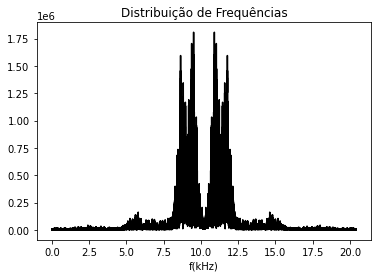

In [167]:
frequencias_sub = np.arange(fft_grilo_sub.size)/10**3
amplitudes_sub = np.abs(fft_grilo_sub)

plt.plot(frequencias_sub,amplitudes_sub,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');

In [168]:
signal_fft_zerado=fft_grilo
signal_fft_zerado[int(fs_nova*2):(fft_grilo.size-int(fs_nova*2))]=0


##NÃO CALCULEI A TAXA DE NYQUIST, SÓ QUERIA TESTAR MSM##

In [169]:
(fft_grilo.size-int(fs_nova*2))

173113

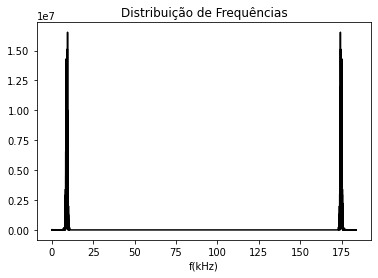

In [170]:
frequencias_sub = np.arange(fft_grilo.size)/10**3
amplitudes_sub_zer = np.abs(signal_fft_zerado)

plt.plot(frequencias_sub,amplitudes_sub_zer,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');

In [171]:
##RECUPERANDO O SINAL PARA A SUBAMOSTRAGEM

signal_recup=sci.fft.ifft(signal_fft_zerado)


Escutando o áudio abaixo, notamos a melhora da qualidade do sinal subamostrado com o processo proposto.

In [172]:

##SUBAMOSTRANDO

signal_recup_sub=signal_recup[::9]

In [173]:
ipd.Audio(signal_recup_sub,rate=int(fs_nova))

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


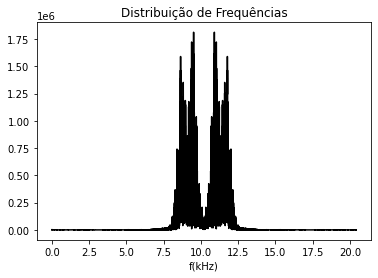

In [174]:
##PLOTANDO O SINAL SUBAMOST
fft_grilo_sub_fim=sci.fft.fft(signal_recup_sub)

frequencias_sub_fim = np.arange(fft_grilo_sub_fim.size)/10**3
amplitudes_sub_fim = np.abs(fft_grilo_sub_fim)

plt.plot(frequencias_sub_fim,amplitudes_sub_fim,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');

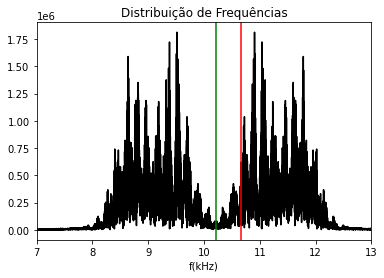

In [175]:
fft_grilo_sub_fim=sci.fft.fft(signal_recup_sub)

frequencias_sub_fim = np.arange(fft_grilo_sub_fim.size)/10**3
amplitudes_sub_fim = np.abs(fft_grilo_sub_fim)

plt.plot(frequencias_sub_fim,amplitudes_sub_fim,c='black');
plt.title('Distribuição de Frequências')
plt.xlabel('f(kHz)');
plt.xlim((7,13))
plt.axvline((len(frequencias_sub_fim)/2)/1000,c='g')
plt.axvline((fs_nova*2/1000),c='r')

In [176]:
len(frequencias_sub_fim)/2/1000

10.21